In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# !wget https://coastwatch.pfeg.noaa.gov/erddap/griddap/erdMH1chla1day.json?chlorophyll[(2020-02-16T12:00:00Z):1:(2020-02-16T12:00:00Z)][(89.97916):1:(-89.97918)][(-179.9792):1:(179.9792)]

In [4]:
# with open('erdMH1chla1day.htmlTable?chlorophyll') as chlorophyll_data:
#     print(chlorophyll_data.head())
    
# chlorophyll = pd.read_json('erdMH1chla1day.json')
# chlorophyll.head()

In [12]:
from zipfile import ZipFile
!wget https://s3.us-east-2.amazonaws.com/earthstatdata/HarvestedAreaYield175Crops_Indvidual_Geotiff/wheat_HarvAreaYield_Geotiff.zip

--2020-02-25 20:46:42--  https://s3.us-east-2.amazonaws.com/earthstatdata/HarvestedAreaYield175Crops_Indvidual_Geotiff/wheat_HarvAreaYield_Geotiff.zip
Resolving s3.us-east-2.amazonaws.com (s3.us-east-2.amazonaws.com)... 52.219.80.226
Connecting to s3.us-east-2.amazonaws.com (s3.us-east-2.amazonaws.com)|52.219.80.226|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10437960 (10.0M) [application/zip]
Saving to: ‘wheat_HarvAreaYield_Geotiff.zip’

wheat_HarvAreaYield 100%[===================>]   9.95M  37.0MB/s    in 0.3s    

2020-02-25 20:46:43 (37.0 MB/s) - ‘wheat_HarvAreaYield_Geotiff.zip’ saved [10437960/10437960]



In [18]:
with ZipFile('wheat_HarvAreaYield_Geotiff.zip') as crops:
    #crops.printdir()
    crops.extractall()

In [19]:
import xarray as xr
wheat = xr.open_rasterio('wheat_HarvAreaYield_Geotiff/wheat_YieldPerHectare.tif')
#wheat_arr = xr.open_rasterio(wheat)

In [20]:
# Set environment variables for cloud-optimized-geotiffs efficiency
env = rasterio.Env(GDAL_DISABLE_READDIR_ON_OPEN='EMPTY_DIR',
                   CPL_VSIL_CURL_USE_HEAD=False,
                   CPL_VSIL_CURL_ALLOWED_EXTENSIONS='TIF')

NameError: name 'rasterio' is not defined

In [21]:
wheat.head()

<xarray.DataArray (band: 1, y: 5, x: 5)>
array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]], dtype=float32)
Coordinates:
  * band     (band) int64 1
  * y        (y) float64 89.96 89.87 89.79 89.71 89.62
  * x        (x) float64 -180.0 -179.9 -179.8 -179.7 -179.6
Attributes:
    transform:         (0.0833333333333286, 0.0, -180.0, 0.0, -0.083333333333...
    crs:               +init=epsg:4326
    res:               (0.0833333333333286, 0.0833333333333286)
    is_tiled:          1
    nodatavals:        (nan,)
    scales:            (1.0,)
    offsets:           (0.0,)
    AREA_OR_POINT:     Area
    TIFFTAG_SOFTWARE:  MATLAB 8.0, Mapping Toolbox 3.6

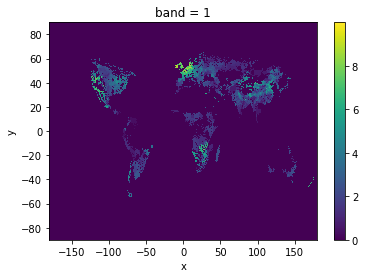

In [22]:
wheat.plot()

In [ ]:
wheat_df = pd.data